## Usecase : <span style='color:orange'>To Predict whether a client has subscribed to a term deposit or not</span>


# Objective:
----------

Training a classification model to predict whether a client has subscribed (yes/no) to a term deposit or not (variable y).


### Steps and tasks:
----------------

1. Import the necessary libraries.

2. Read the data as a data frame.

3. Perform basic EDA which should include the following and print out your insights at every step. 
               a. Shape of the data 
               b. Data type of each attribute 
               c. Checking the presence of missing values 
               d. 5 Point summary of numerical attributes
               e. Checking the presence of outliers
               
4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc.

5. Train a few standard classification algorithms, note and comment on the performances across different classification metrics.

6. Build the ensemble models and compare the results with the base models. 

Note: 
Random forest can be used only with Decision trees.

7. Compare performances of all the models.


## INDEX<a id="idx"></a>

### 1. Libraries & Packages
- [**Libraries**](#L1)

### 2. Reading Dataset
- [**Dataset**](#D)

### 3. Exploratory Data Analysis
 - <span style='color:blue'>**E**</span><span style='color:red'>**D**</span><span style='color:green'>**A :**</span> [*@Decorators*](#EDA)

 - [**3.1 Shape of Data**](#3.1)
 - [**3.2 Data types**](#3.2)
 - [**3.3 Missing Data**](#3.3)
 - [**3.4 Duplicate Data**](#3.4)
 - [**3.5 Categorical Features**](#3.5)
 - [**3.6 Numerical Features**](#3.6)
 - [**3.7 Statistical Analysis**](#3.7)
 - [**3.8 Target Distribution**](#3.8)
 - [**3.9 Pie Charts**](#3.9)
 - [**3.10 Bar Graphs**](#3.10)
 - [**3.11 Boxplots**](#3.11)
 - [**3.12 Density Plots**](#3.12)
 - [**3.13 KDE Plots**](#3.13)
 - [**3.14 Dist Plots**](#3.14)
 - [**3.15 Bar Graphs Bivariate**](#3.15)

### 4. Data Preprocessing
 - [**4.1 Outlier Treatment**](#4.1)
 - [**4.2 Missing Values Treatment**](#4.2)
 - [**4.3 Onehot Encoding**](#4.3)
 - [**4.4 Scaling**](#4.4)
 - [**4.5 Train Test Split**](#4.5)
 - [**4.6 Data Imbalance Treatment**](#4.6)

### 5. Modelling
 - [**Classification Algorithms**](#5) 
 
### 6. HyperParameter Tuning
 - [**Performance Metrics**](#6)

In [77]:
# !pip uninstall matplotlib

In [84]:
# !pip install matplotlib

## 1. Importing Required Libraries<a id='L1'></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from scipy.stats import skew,kurtosis

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score


from sklearn import svm
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics import accuracy_score,precision_score, recall_score,auc,classification_report,confusion_matrix,f1_score,roc_auc_score
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

# plt.rcParams['font.sans-serif']=['Heiti TC']  

In [43]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 16F2-2D68

 Directory of C:\Users\DharmendraGa_5wskc\AI Training BS\Tasks\AL Tasks\client subscription

12-04-2022  08:46    <DIR>          .
12-04-2022  08:46    <DIR>          ..
12-04-2022  08:44    <DIR>          .ipynb_checkpoints
07-04-2022  10:13         3,706,099 bank-full.csv
07-04-2022  16:43            34,148 download.png
12-04-2022  08:46            84,709 Usecase_Team1.ipynb
               3 File(s)      3,824,956 bytes
               3 Dir(s)  386,259,873,792 bytes free


## 2. Reading the Dataset<a id=D></a>

In [44]:
df = pd.read_csv("bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**Data Description:**

1. age (numeric)

2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4. education: 'tertiary', 'secondary', 'unknown', 'primary'

5. default: has credit in default? (categorical: 'no','yes','unknown')

6. balance: money in the bank account.

7. housing: has housing loan? (categorical: 'no','yes','unknown')

8. loan: has personal loan? (categorical: 'no','yes','unknown')

9. contact: contact communication type (categorical: 'cellular','telephone')

10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11. day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri').

12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target.(e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15. previous: number of contacts performed before this campaign and for this client (numeric)

16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

17. Output variable (desired target): has the client subscribed a term deposit? (binary: 'yes','no')

## dtale - Easy Analysis

- D-Tale is the combination of a Flask back-end and a React front-end to bring you an easy way to view & analyze Pandas data structures.

In [45]:
# pip install pandas-profiling
# from pandas_profiling import ProfileReport
# pip install dtale
import dtale
dtale.show(df)

[**Index**](#idx)

## 3. Exploratory Data Analysis<a id='EDA'></a>
### <span style='color:green'>@ Decorators</span>

In [46]:
def piecharts(plot):
    def figure(data, cols):
        plot()
        fig, axes = plt.subplots(3,3, figsize=(14,15))
        axes = [ax for axes_row in axes for ax in axes_row]
        plt.suptitle("Pie Charts for Categorical Features")
        for i,c in enumerate(data[cols]):
          _ = data[c].value_counts()[::-1].plot(kind='pie', ax=axes[i], title=c, autopct="%.1f", fontsize=12)
          _ = axes[i].set_label('')
        _ = plt.tight_layout()
    return figure
        
def bargraphs(plot):
    def figure(data, cols):
        plot()
        fig, axes = plt.subplots(3, 3, figsize=(16, 16))
        axes = [ax for axes_row in axes for ax in axes_row]
        plt.suptitle("Bargraphs for Categorical Features")
        for i, c in enumerate(data[cols]):
            _ = data[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
        _ = plt.tight_layout()
    return figure

def boxplots(plot):
    def figure(data,cols):
        plot()
        fig, axes = plt.subplots(7, 1, figsize=(16, 25))
        # plt.suptitle("Boxplots for Outlier Detection")
        for i, c in enumerate(cols):
          _ = data[[c]].boxplot(ax=axes[i], vert=False)
    return figure

def density_plots(plot):
    def figure(data, cols):
        plot()
        sns.set(font_scale=1.3)
        fig, axes = plt.subplots(4, 2, figsize=(18, 14))
        plt.suptitle("Density Plots for Numerical Features")
        axes = [ax for axes_row in axes for ax in axes_row]
        for i, c in enumerate(cols):
            _ = sns.kdeplot(data=data, x=c, ax=axes[i], fill=True, color='green')
        _ = plt.tight_layout()
    return figure

def distplots(plot):
    def figure(data, cols):
        plot()
        for col in cols:
            fig=plt.figure(figsize=(8,4))
            ax=fig.gca()
            mean = 'mean' + ' : '+ str(round(df[col].mean(),3))
            median = 'median'+' : '+ str(round(df[col].median(),3))
            sns.distplot(df[col])
            ax.axvline(data[col].mean(),color='magenta', linestyle='dashed',linewidth=4)
            ax.axvline(data[col].median(), color='cyan', linestyle='dashed', linewidth=4)
            plt.legend([mean,median])
            ax.set_title(col)
        plt.show()
    return figure
    
def kde_plots(plot):
    def figure(data, cols):
        plot()
        sns.set(font_scale=1.3)
        fig, axes = plt.subplots(4, 2, figsize=(18, 14))
        axes = [ax for axes_row in axes for ax in axes_row]
        plt.suptitle("KDE Plots for Numerical Features")
        for i, c in enumerate(cols):
            _ = sns.kdeplot(data=data, x=c, hue=TARGET_COL, ax=axes[i])
        _ = plt.tight_layout()
    return figure

def bargraphs_bivariate(plot):
    def figure(data, cols):
        plot()
        fig, axes = plt.subplots(5, 2, figsize=(16, 24))
        axes = [ax for axes_row in axes for ax in axes_row]
        plt.suptitle("Bargraphs for Comparing of two features with target")
        for i, c in enumerate(df[cols]):
            fltr = data[TARGET_COL] == 0
            vc_a = data[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)
            vc_b = data[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)
            vc_a[TARGET_COL] = 0
            vc_b[TARGET_COL] = 1
            d = pd.concat([vc_a, vc_b]).reset_index(drop = True)
            _ = sns.barplot(y = c, x = 'count', data = d , hue=TARGET_COL, ax=axes[i])
        _ = plt.tight_layout()
    return figure

[**Index**](#idx)

#### 3.1Shape of Dataset (features & observations)<a id=3.1></a>

In [47]:
TARGET_COL = 'Target'
print(f'\nDataset contains {df.shape[0]} rows and {df.shape[1]} variables')
features = [c for c in df.columns if c not in [TARGET_COL]]
print(f'\nInput Features are: \n{features}')


Dataset contains 45211 rows and 17 variables

Input Features are: 
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']


#### 3.2 Data types<a id=3.2></a>

In [48]:
df.info()
print(f'''\nDataset Contains : 
{len(df.select_dtypes(include='object').columns)} 'object dtype' features
{len(df.describe().columns)} 'integer dtype' features''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Dataset Contains : 
10 'object dtype' features
7 'integer dtype' features


#### 3.3 Missing Data <a id=3.3></a>

In [49]:
# Checking the Missing data 
null_values_per_variable = 100*(df.isnull().sum()/len(df)).round(3)
null_values_per_variable.sort_values(ascending=False)

age          0.0
day          0.0
poutcome     0.0
previous     0.0
pdays        0.0
campaign     0.0
duration     0.0
month        0.0
contact      0.0
job          0.0
loan         0.0
housing      0.0
balance      0.0
default      0.0
education    0.0
marital      0.0
Target       0.0
dtype: float64

#### 3.4 Duplicate Data<a id=3.4></a>

In [50]:
# checking duplicate values in the data.
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


**3.5 Categorical Features**<a id=3.5></a>

In [51]:
categorical = df.select_dtypes(include=['object'])
cat_cols = [c for c in features if c in categorical]
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

**3.6 Numerical Features**<a id=3.6></a>

In [52]:
num_cols = [n for n in features if n not in cat_cols]
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

#### 3.7 Statistical Analysis<a id=3.7></a>

In [53]:
df_stats = df[num_cols].describe().T
df_stats['skewness'] = skew(df[num_cols])
df_stats['kurtosis'] = kurtosis(df[num_cols])
df_stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0,0.684795,0.319402
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0,8.360031,140.735848
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0,0.093076,-1.059913
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0,3.144214,18.151775
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0,4.898488,39.245178
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0,2.615629,6.934296
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0,41.845066,4506.362118


From the above we can observe mean,median, mode and skewness of the data.

Most of the numerical columns in the data set are right skewed.

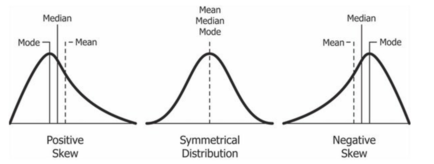

**If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.**

**If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.**

**If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.**

#### 3.8 Target Distribution<a id=3.8></a>

In [54]:
df[TARGET_COL].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

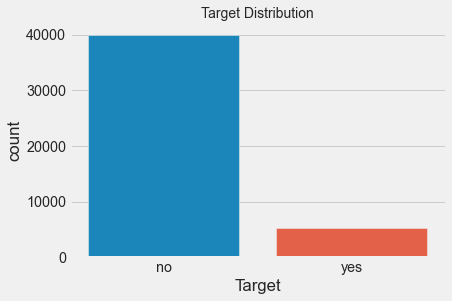

In [55]:
# Countplot
sns.countplot(df[TARGET_COL])
plt.title("Target Distribution", fontsize=14);

By the Above plot we can see the dataset is quite imbalanced as 88% of data is one category and 11% is one category, so a dumb model can give 88% accuracy by predicting all as the majority class. So to deal with this imbalance we can use some oversampling techniques.

[**Index**](#idx)

### Univariate Analysis

#### 3.9 Pie Charts<a id=3.9></a>

Pie Charts


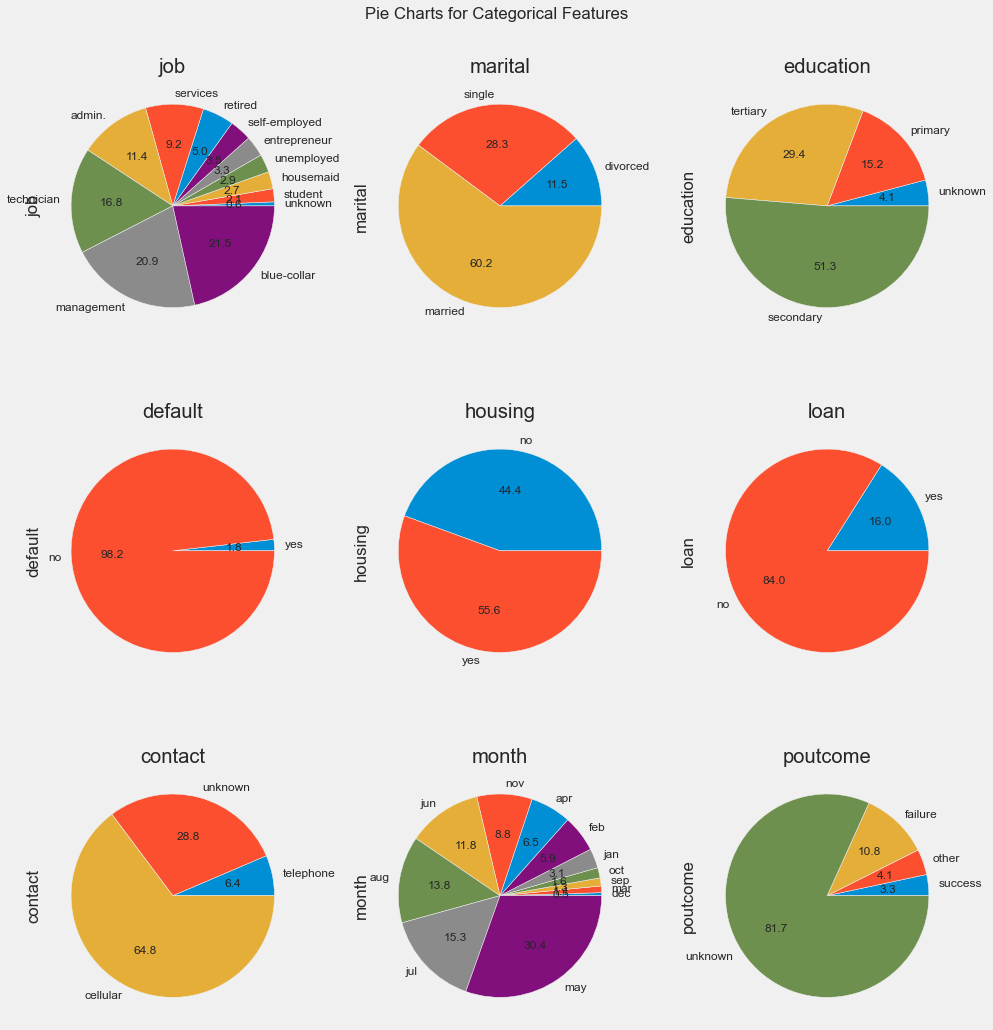

In [56]:
@piecharts
def display():
    print("Pie Charts")
display(df,cat_cols)

By the above pie charts we can see how much portion or percentage of a subcategory is related to target distribution in each categorical feature by this we can target the customers accordingly.

- 60% of the customers are married and 28% are single and the remaining were divorced
- Most of the customers(98%) has their default as 'no' and only 2% has 'yes'
- 84% of the customers has no personal loan and only 16% has the personal loan
- 65% of the customers using cellular communication type and %6 are telephone


#### 3.10 Bar Graphs<a id=3.10></a>

Bar Graphs


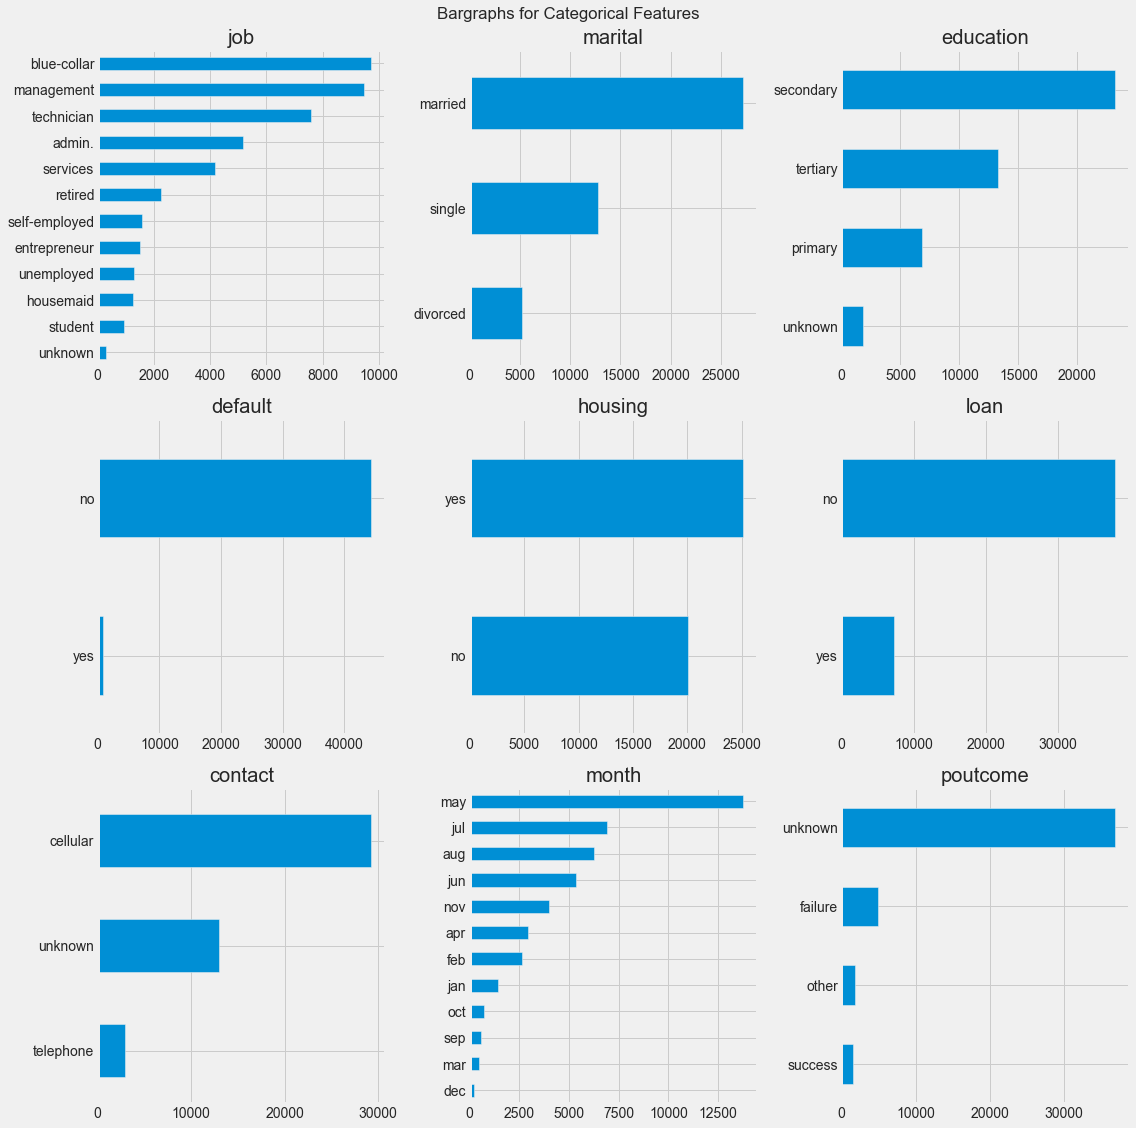

In [57]:
@bargraphs
def display():
    print("Bar Graphs")
display(df,cat_cols)

By the above bargraphs we can interpret as similar to the piecharts but here we can see the exact number of customers represented in bars so that we can have more details

#### 3.11 Boxplots<a id=3.11></a>

Outlier Detection


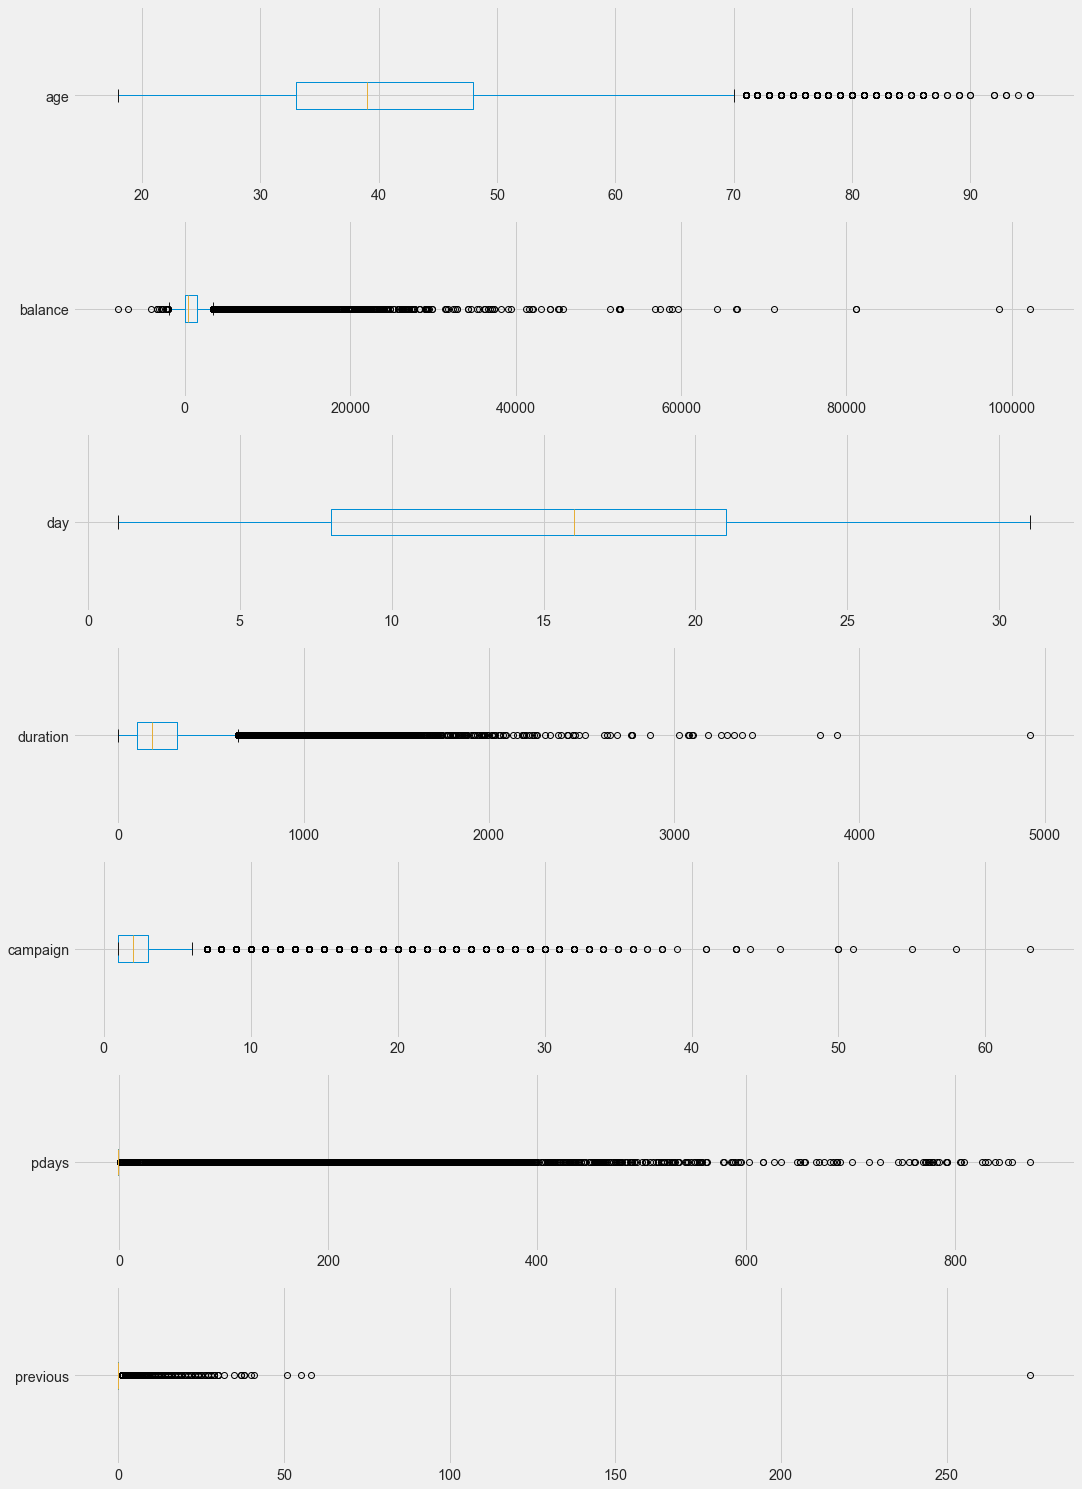

In [58]:
@boxplots
def display():
    print("Outlier Detection")
display(df, num_cols)

With the help of boxplots we can detect outliers and here in this data most of the features showing outliers but we cannot decide every thing is outlier which is shown here 

for example in age feature 70 to 100 age is showing as outliers but in reality there is a possibility of having age even greater than 100 and similarly in balance feature more than 40000 showing as outliers but some customers may have huge amount. So we can also try with modelling without dealing outliers and then compare the performance.

#### 3.12 Density Plots<a id=3.12></a>

Density Plots


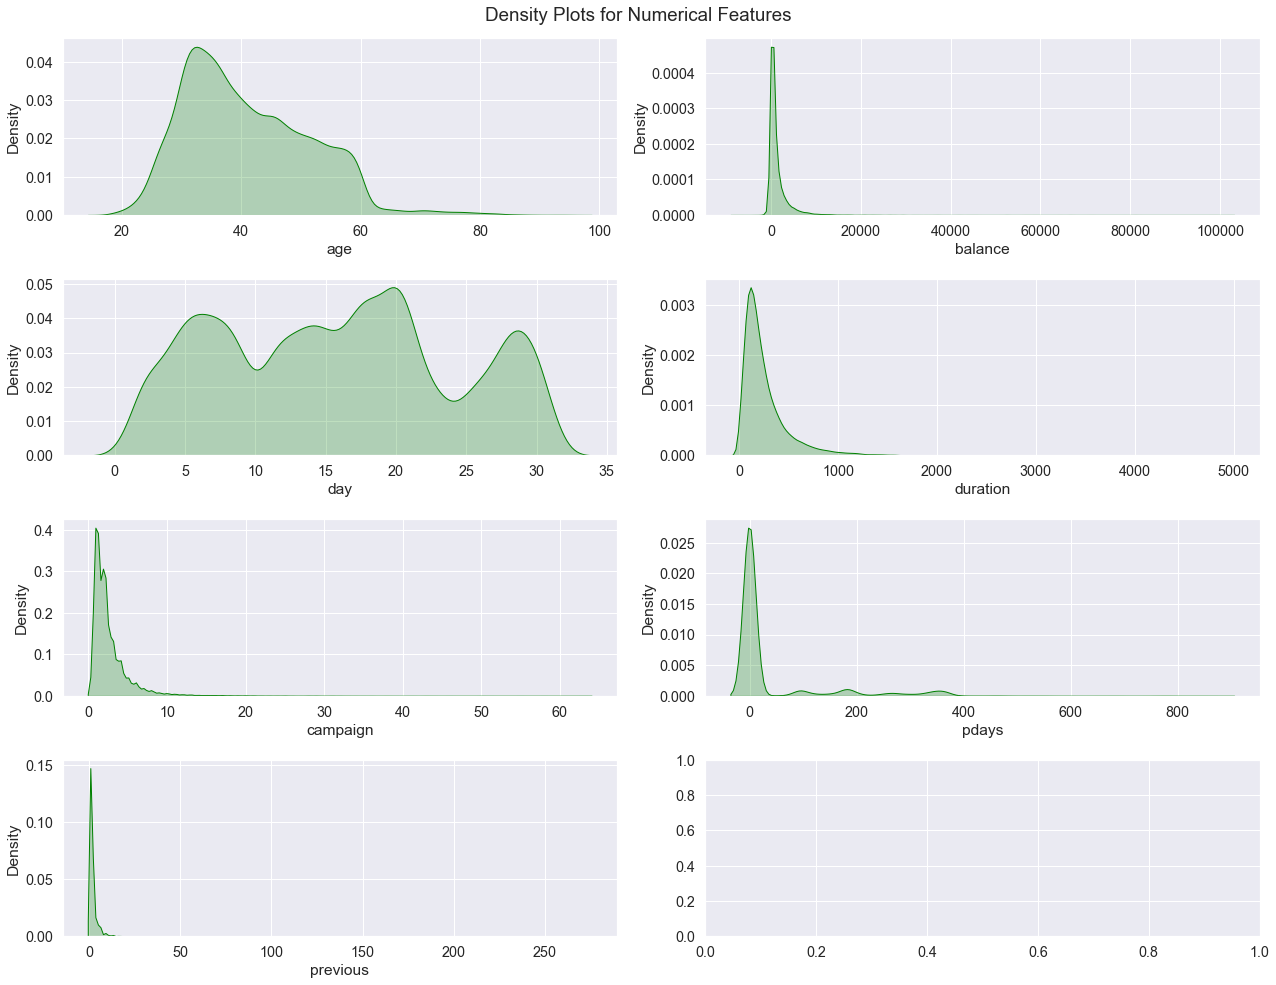

In [59]:
@density_plots
def display():
    print("Density Plots")
display(df, num_cols)

In Density plots we can see the density of each feature and can observe at which data range has the highest density like if we see in age at which age group of customers have high chances of subscribing a term deposit or not likewise

- Customers of age group 20 to 60 are having high chance of subscribing term deposit 
- Most of the customers are having upto 20000 balance in their accounts and few people having more than that.

#### 3.13 KDE Plots<a id=3.13></a>

KDE Plots


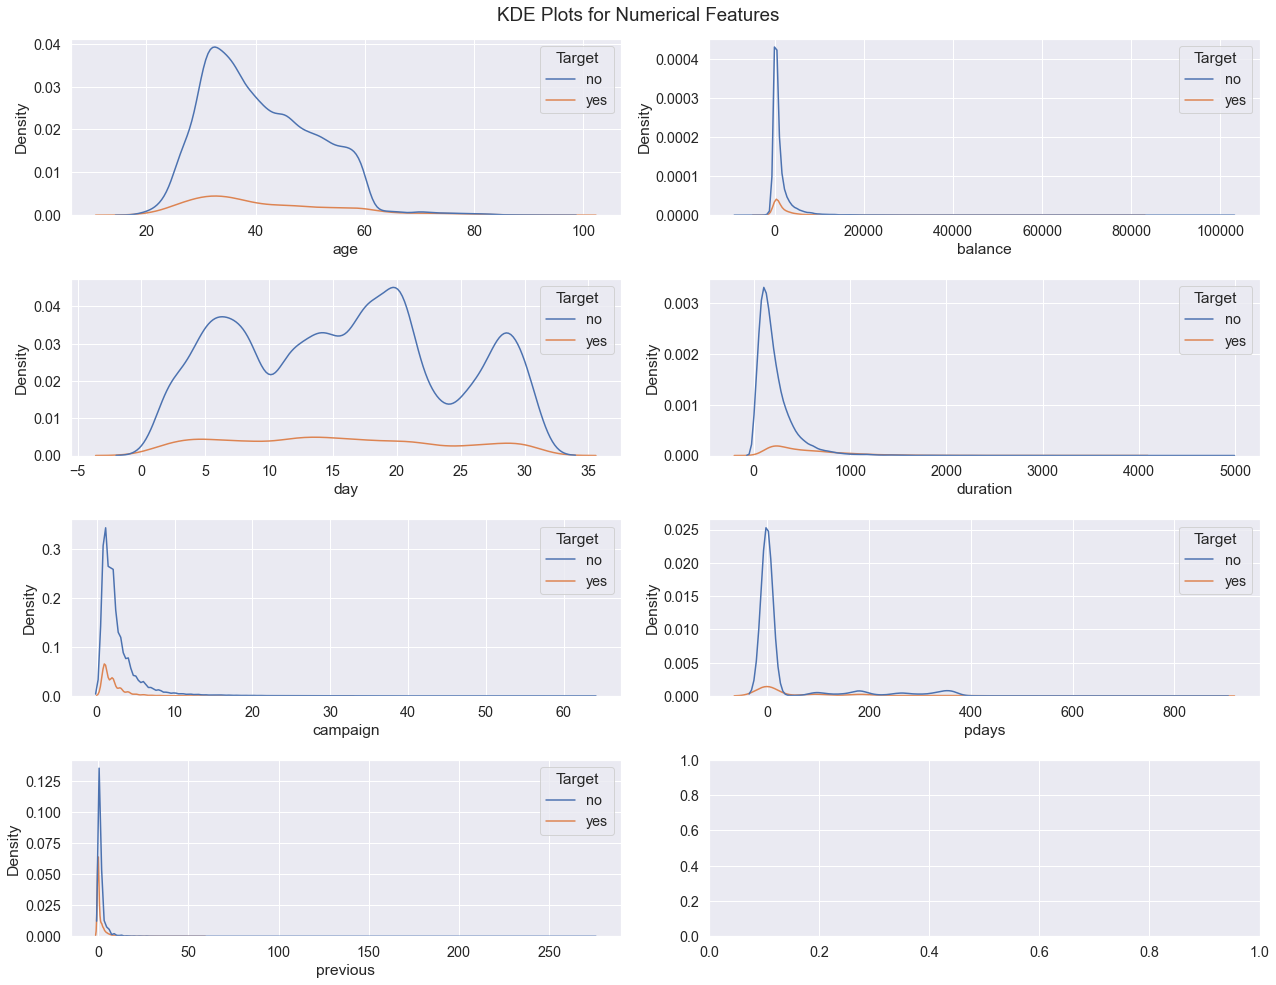

In [60]:
@kde_plots
def display():
    print("KDE Plots")
display(df, num_cols)

#### 3.14 Distplots<a id=3.14></a>

Data Distribution Plots


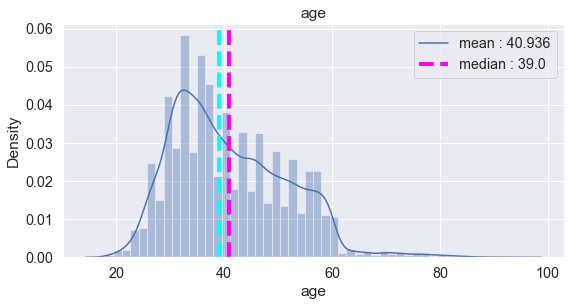

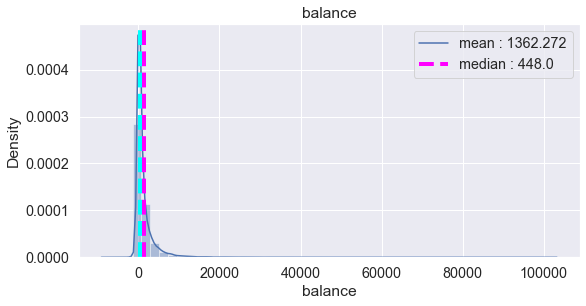

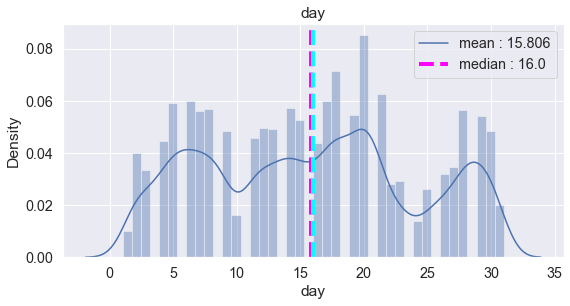

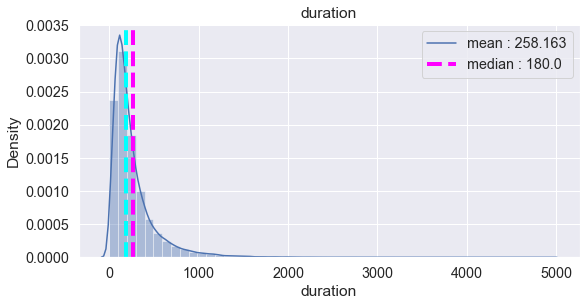

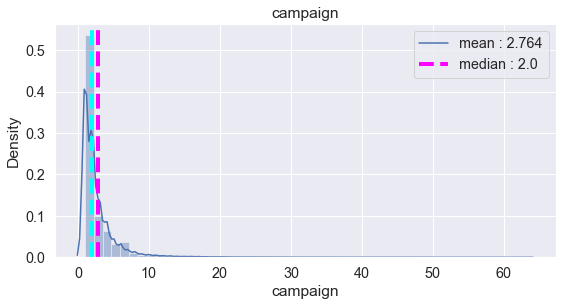

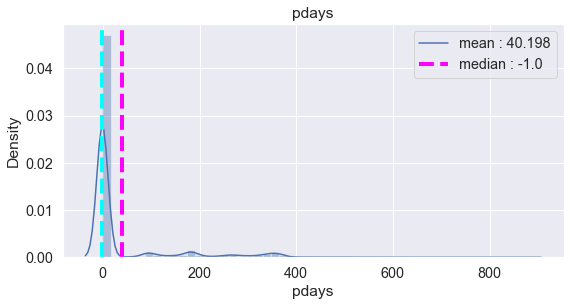

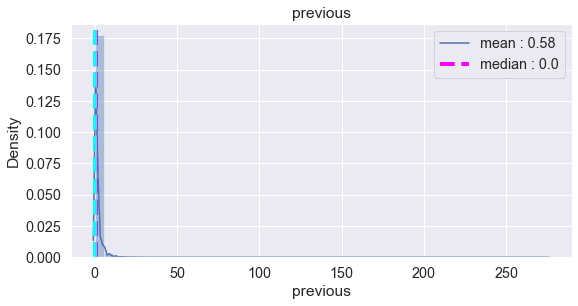

In [61]:
@distplots
def display():
    print("Data Distribution Plots")
display(df, num_cols)

To know the distribution of data we can use these plots and can observe the patterns like whether the data is skewed or not and the data is normally distributed or not likewise and by drawing mean and median we can see both are close or any huge variance between them

#### 3.15 Bivariate Analysis<a id=3.15></a>

**Relationship Between two Variabels**

In [62]:
# Encoding Target column into numeric
df['Target'] = df['Target'].apply(lambda x: 0 if x=='no' else 1)

Comparing Two Features at a time with the target


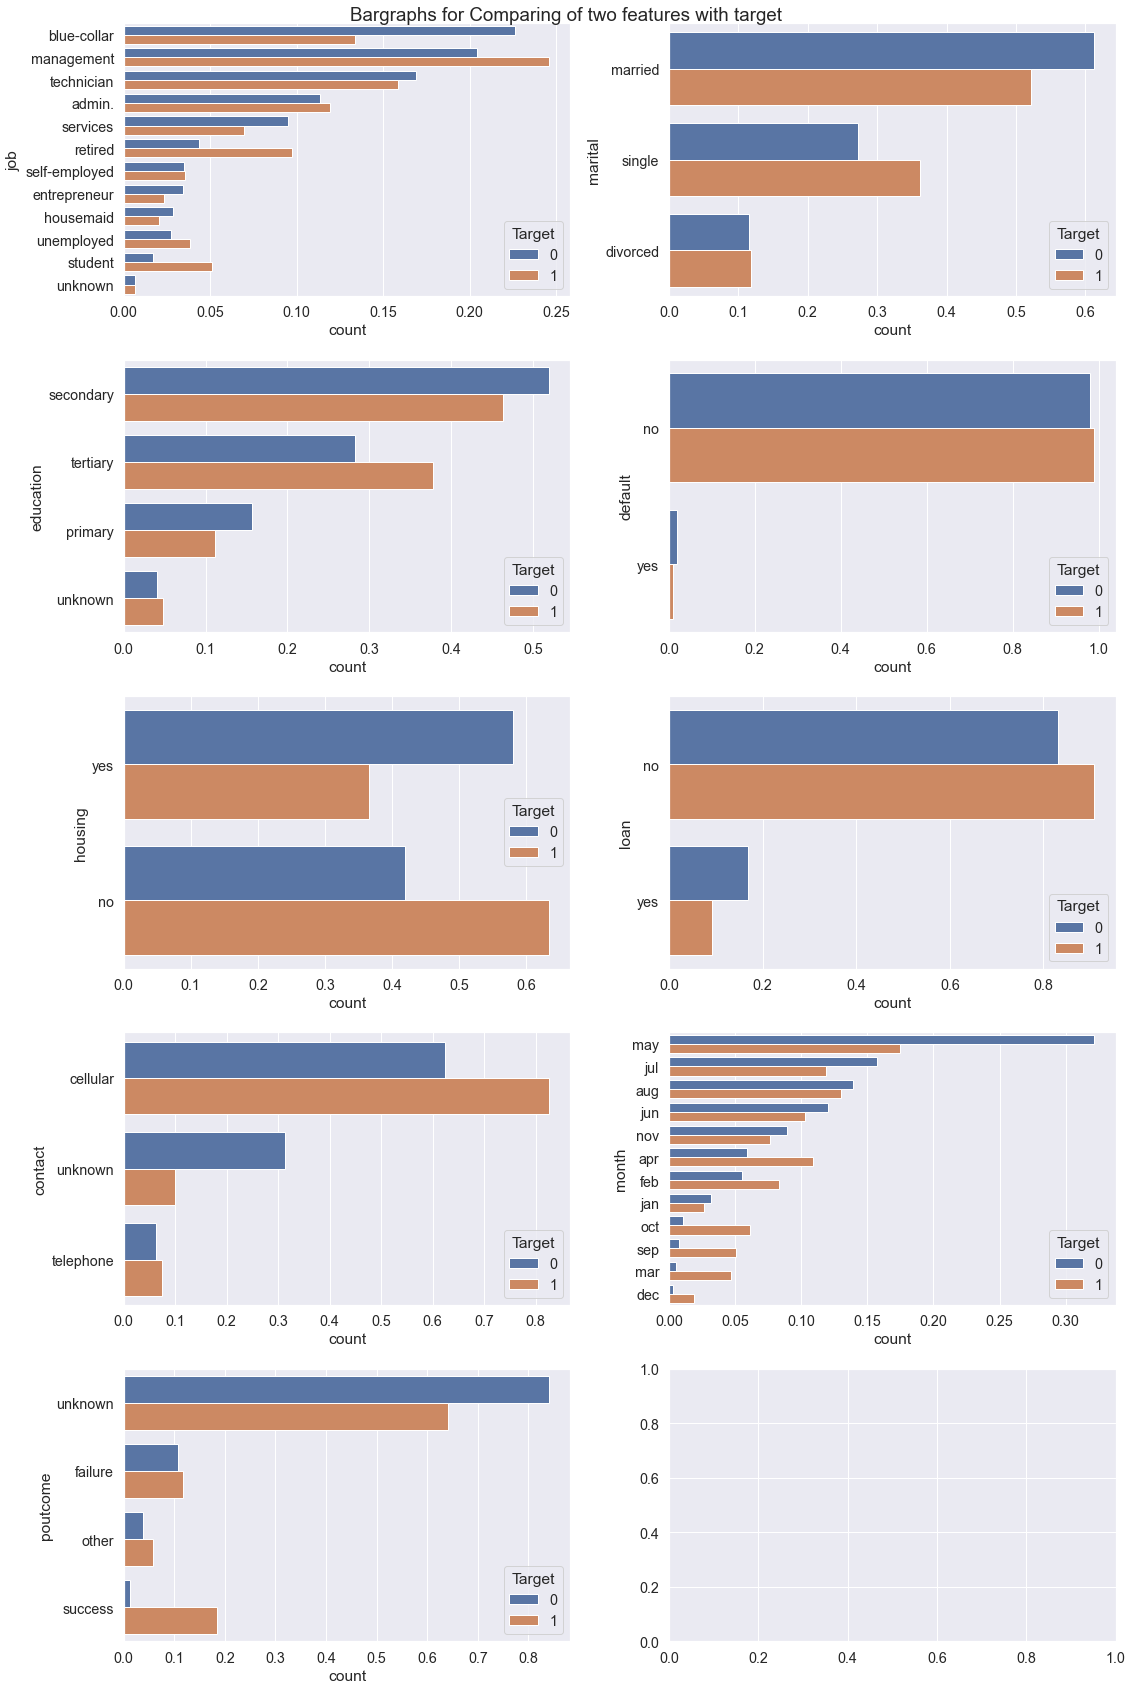

In [63]:
@bargraphs_bivariate
def display():
    print("Comparing Two Features at a time with the target")
display(df,cat_cols)

By comparing the features with target we can observe which category has the high impact on the target feature and what kind of customers has more chances to subscribe a term deposit or not 

- In Job type feature management has high subscription rate above all other types and technicians having 2nd highest rate of subscription
- Married people and singles are having more subscription rate 
- The customers who are not having personal loan are subscribed to the term deposit mostly
- Cellular type communicated customers are having high chances of subscribing a term deposit

[**Index**](#idx)

## 4. Data Preprocessing

### 4.1 Outlier Treatment<a id=4.1></a>

**Winsorization Technique:**

- Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.

In [64]:
# winsorization
def outlier_treatment(column):
    sorted(column)
    q1,q3 = np.percentile(column,[25,75])
    iqr = q3 -q1
    lower_range = q1 - (1.5 * iqr)
    upper_range = q3 + (1.5 * iqr)
    return lower_range,upper_range,iqr

lb = []
ub = []
iqr = []
no_out = []
for col in num_cols:
    lb.append(outlier_treatment(df[col])[0])
    ub.append(outlier_treatment(df[col])[1])
    iqr.append(outlier_treatment(df[col])[2])
    
# Preparing a function that returns information on Outliers
def outlier_data(cols):
    count = []
    for col in num_cols:
        count.append(df[(df[col] < lb[num_cols.index(col)]) | (df[col] > ub[num_cols.index(col)])].shape[0])
    miss = pd.DataFrame({'Col_name':num_cols,
                         'Lower_bound':lb,
                         'Upper_bound':ub,
                         'iqr': iqr,
                         'No of outliers':count,
                         'Percentage_outliers':list((np.array(count)*100)/df.shape[0])})
    return miss.sort_values(by='No of outliers',ascending=False)

In [65]:
outlier_data(num_cols)

,Col_name,Lower_bound,Upper_bound,iqr,No of outliers,Percentage_outliers
5,pdays,-1.0,-1.0,0.0,8257,18.263255
6,previous,0.0,0.0,0.0,8257,18.263255
1,balance,-1962.0,3462.0,1356.0,4729,10.459844
3,duration,-221.0,643.0,216.0,3235,7.155338
4,campaign,-2.0,6.0,2.0,3064,6.777112
0,age,10.5,70.5,15.0,487,1.077171
2,day,-11.5,40.5,13.0,0,0.000000


### 4.2 Missing Values Treatment<a id=4.2></a>

In [66]:
def data_imputation(df, imp_by=None, ignore_target=None):
    cols = [c for c in df.columns.tolist() if c not in ignore_target]
    print(f"imputing missing data with '{imp_by}' for numerical columns and 'mode' for categorical columns")
    for col in cols:
        if df[col].dtype=='int64' or df[col].dtype=='int32':
            if imp_by == 'mean':
                df[col].fillna(df[col].mean(), inplace=True)
            elif imp_by == 'median':
                df[col].fillna(df[col].median(), inplace=True)
            else:
                print("Invalid Method!")
        else:
            df[col].fillna(df[col].mode())
            
data_imputation(df, imp_by='mean', ignore_target='Target')

imputing missing data with 'mean' for numerical columns and 'mode' for categorical columns


### 4.3 One Hot Encoding<a id=4.3></a>

In [67]:
df_new = pd.get_dummies(data=df,columns=cat_cols,drop_first=True)
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### 4.4 Standardization / Normalization<a id=4.4></a>

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
s = StandardScaler()
df_new[num_cols] = s.fit_transform(df_new[num_cols])
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,0,1,0,0,0,0,0,1


After Scaling


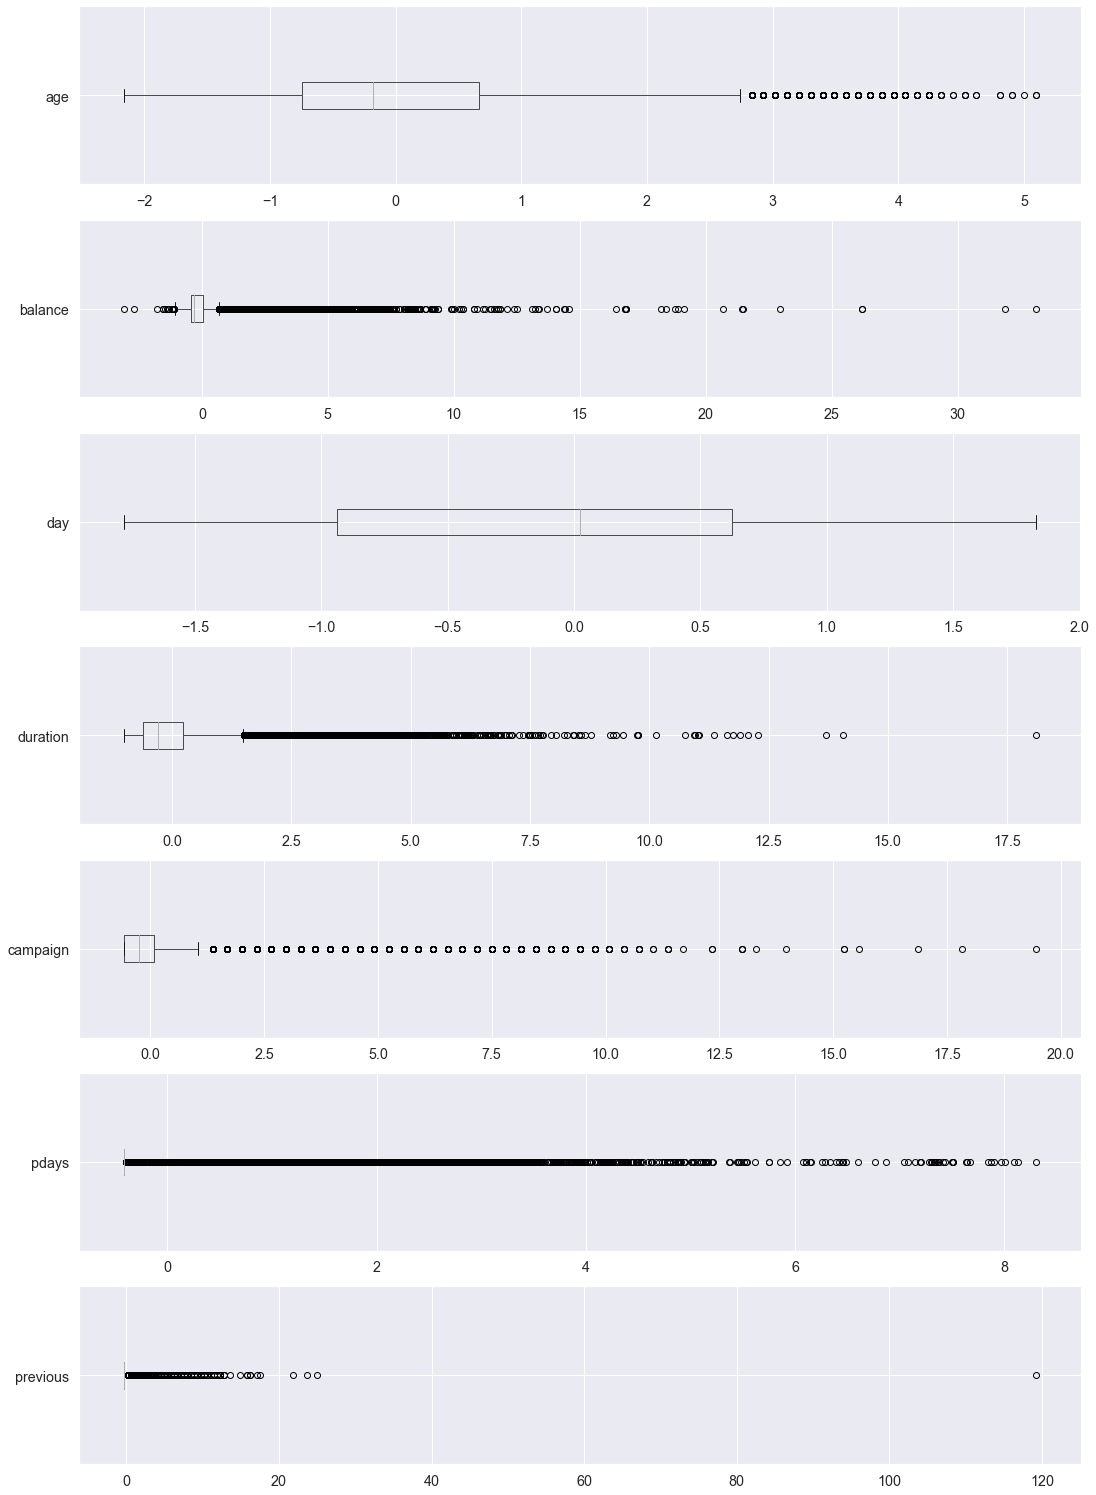

In [88]:
@boxplots
def display():
    print("After Scaling")
display(df_new, num_cols)

### 4.5 Train Test Split<a id=4.5></a>

In [70]:
X =  df_new.drop('Target',axis=1)
y = df_new['Target']
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((31647, 42), (31647,), (13564, 42), (13564,))

### 4.6 Data Imbalance Treatment<a id=4.6></a>

In [78]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state= 0)
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train.shape, y_train.shape

((55912, 42), (55912,))

[**Index**](#idx)

## 5. Model Building<a id=5></a>

In [79]:
# Different Classification Algorithms
def build_models(X_train,X_test,y_train,y_test):
    models = [LogisticRegression(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),svm.SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),ExtraTreeClassifier(),LGBMClassifier(),XGBClassifier(),XGBRFClassifier()]
    accuracy_ = []
    f1_score_ = []
    precision_ = []
    recall_ = []
    models_ = ['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','SVC','KNeighborsClassifier','DecisionTreeClassifier','ExtraTreeClassifier','LGBMClassifier','XGBClassifier','XGBRFClassifier']
    metrics = {'Algorithm':models_,
               'Accuracy':accuracy_,
              'f1_score':f1_score_,
              'precession':precision_,
              'recall':recall_}
    for val in models:
        model = val
        model.fit(X_train,y_train) 
        prediction=model.predict(X_test)
        accuracy_.append(accuracy_score(prediction,y_test))
        f1_score_.append(f1_score(prediction,y_test))
        precision_.append(precision_score(prediction,y_test))
        recall_.append(recall_score(prediction,y_test))
    df_models = pd.DataFrame(metrics).sort_values(by='f1_score', ascending=True).reset_index(drop=True)
    return df_models

In [80]:
# Applying models 
models = build_models(X_train,X_test,y_train,y_test)
models

[09:19:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:19:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Algorithm,Accuracy,f1_score,precession,recall
0,ExtraTreeClassifier,0.842082,0.453013,0.555069,0.382657
1,DecisionTreeClassifier,0.863757,0.485810,0.546308,0.437375
2,XGBRFClassifier,0.808242,0.503531,0.825407,0.362263
3,LogisticRegression,0.855426,0.525526,0.679599,0.428402
4,KNeighborsClassifier,0.840976,0.540183,0.792866,0.409635
5,AdaBoostClassifier,0.868770,0.550051,0.680851,0.461408
6,SVC,0.865821,0.565217,0.740300,0.457110
7,XGBClassifier,0.899219,0.566994,0.560075,0.574086
8,RandomForestClassifier,0.893542,0.579254,0.622028,0.541985
9,LGBMClassifier,0.896491,0.593985,0.642678,0.552151


### 6 Hyper Parameter Tuning<a id=6></a>

In [81]:
# Decision Tree Tuning
from sklearn.model_selection import RandomizedSearchCV

decision_params = {
    'max_depth': [4, 6, 8, 10, 12, 14, 16],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128,256],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

clf = RandomizedSearchCV(DecisionTreeClassifier(),
                         decision_params,
                         scoring='f1',
                         random_state=1,
                         n_iter=20)

clf.fit(X_train, y_train)

optimal_params = clf.best_params_

clf = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

f1_score(y_test, y_preds)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 2},
                                                         {0: 1, 1: 3},
                                                         {0: 1, 1: 4},
                                                         {0: 1, 1: 5}],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 6, 8, 10, 12, 14, 16],
                                        'max_features': [0.2, 0.4, 0.6, 0.8, 1],
                                        'max_leaf_nodes': [8, 16, 32, 64, 128,
                                                           256],
                                        'min_samples_split': [2, 10, 20, 30,
                                                              40]},
                   random_state=1, scoring='f1')

0.5320994794679005

In [82]:
# Random Forest Tuning
rfc_params = {
    'n_estimators' : [90,100,115,130],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'max_features' : ['auto', 'log2']
}

rs_cv = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rfc_params, cv=5, n_jobs=-1, verbose=3)

rs_cv.fit(X_train, y_train)

params = rs_cv.best_params_

rfc = RandomForestClassifier(**params, random_state=6)
rfc.fit(X_train, y_train)
y_preds = rfc.predict(X_test)
# Score
print("F1 Score: ")
f1_score(y_test, y_preds)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130]},
                   verbose=3)

RandomForestClassifier(criterion='entropy', max_depth=19, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=115, random_state=6)

F1 Score: 


0.5878430366760707

In [85]:
# Gradient Boosting Tuning
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,100],
    "max_depth":[1,3,5],
    "learning_rate":[0.01,0.1,0.2]
}

cv = RandomizedSearchCV(gbc,parameters,cv=5)
cv.fit(X_train, y_train)

params = cv.best_params_

gbc = GradientBoostingClassifier(**params, random_state=6)
gbc.fit(X_train, y_train)

y_preds = gbc.predict(X_test)

print("F1 Score:")
f1_score(y_test, y_preds)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [1, 3, 5],
                                        'n_estimators': [5, 50, 100]})

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, random_state=6)

F1 Score:


0.5867435158501441

[**Index**](#idx)